## Assignments

The best way to learn plotting is to make a lot of plots. To complete the following you may need to explore [the seaborn documentation](http://seaborn.pydata.org/index.html).

1. Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
    + Choose one variable and plot that variable four different ways.
    + Choose two continuous variables, and plot them three different ways.
    + Choose one continuous variable and one categorical variable, and plot them six different ways.
    + Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.
2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    + Probability distributions
    + Bivariate relationships
    + Whether the distributions or the relationships vary across groups
    + Accompany your plot with a written description of what you see.

When you've completed these exercises, share your results with your mentor.

In [14]:
import pandas as pd
import numpy as np
import datetime as dt
import pyodbc
import psycopg2
import math
import sys
import pyspark.sql.functions as f
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
import warnings
import pickle
from datetime import datetime
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500) 
spark.sql("set spark.sql.hive.convertMetastoreOrc=true")
conf.set("spark.driver.maxResultSize", "3g")
conf.set("spark.sql.parquet.writeLegacyFormat","true")

   subject attention  solutions  score
0        1   divided          1   2.00
1        2   divided          1   3.00
2        3   divided          1   3.00
3        4   divided          1   5.00
4        5   divided          1   4.00


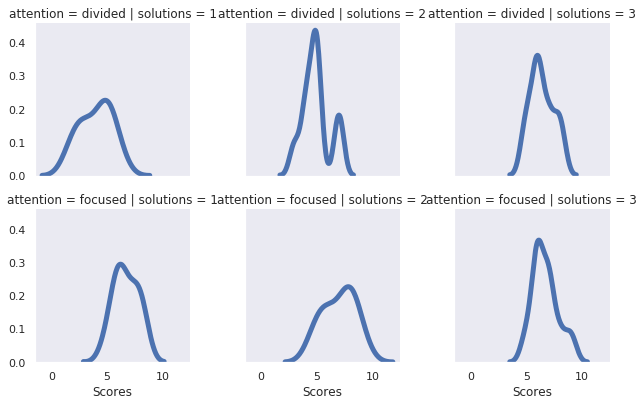

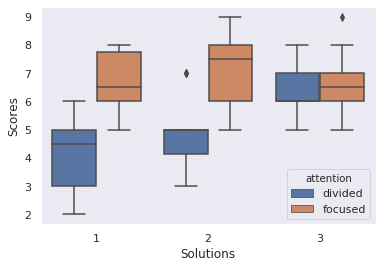

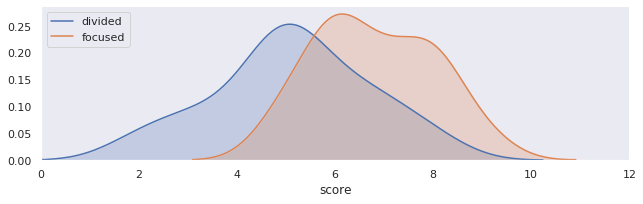

/home_dir/z003tw3/.anaconda/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


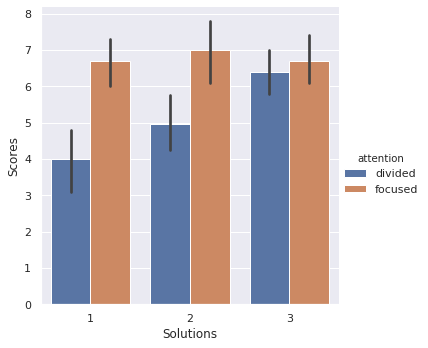

In [58]:
dt = sns.load_dataset("attention")
dt = dt.drop('Unnamed: 0', axis = 1)
print(dt.head())

sns.set(style="dark") 

g = sns.FacetGrid(dt, row="attention", col="solutions")
g.map(sns.kdeplot, 'score', lw=5) 
g.set_axis_labels('Scores')
plt.subplots_adjust(top=0.9)
#plt.suptitle('Plot (1) Scores')
plt.show()

ax = sns.boxplot(x='solutions',y='score',hue='attention',data=dt)  
#plt.title('Plot (2) boxplots')
ax.set(xlabel='Solutions', ylabel='Scores')
plt.show()

fg = sns.FacetGrid(dt, hue="attention", aspect=3, legend_out  = True)
fg.map(sns.kdeplot, "score", shade=True)
fg.set(xlim=(0, 12))
plt.legend(loc='upper left', labels=['divided', 'focused'])
#plt.title('Plot (3) distribution')
plt.show()

sns.set(style="darkgrid")
g = sns.factorplot(x="solutions", y="score", hue="attention", data=dt, kind="bar", ci=95)
g.set_ylabels("Scores")
g.set_xlabels("Solutions")
#plt.title('plot (4) Score within different solutions')
plt.show()

            method  number  orbital_period  mass  distance  year
0  Radial Velocity       1          269.30  7.10     77.40  2006
1  Radial Velocity       1          874.77  2.21     56.95  2008
2  Radial Velocity       1          763.00  2.60     19.84  2011
3  Radial Velocity       1          326.03 19.40    110.62  2007
4  Radial Velocity       1          516.22 10.50    119.47  2009
5  Radial Velocity       1          185.84  4.80     76.39  2008
6  Radial Velocity       1        1,773.40  4.64     18.15  2002
7  Radial Velocity       1          798.50   nan     21.41  1996
8  Radial Velocity       1          993.30 10.30     73.10  2008
9  Radial Velocity       2          452.80  1.99     74.79  2010


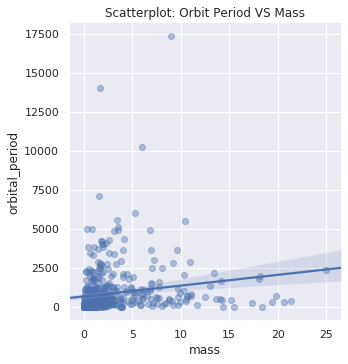

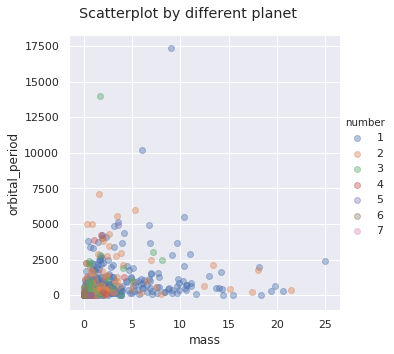

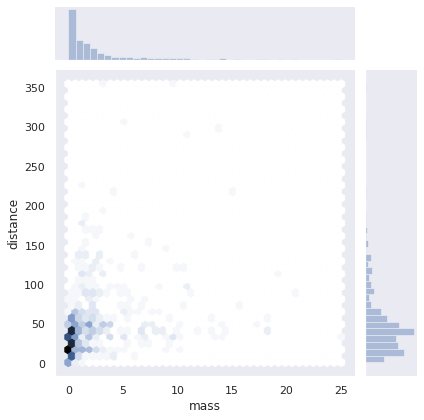

In [49]:
dt = sns.load_dataset("planets")
print(dt.head(10))

g = sns.lmplot(y='orbital_period', 
               x='mass',
               data=dt,
               fit_reg=True, 
               scatter_kws={'alpha':0.4}) 
g.set_ylabels('orbital_period')
g.set_xlabels('mass')
plt.title('Scatterplot: Orbit Period VS Mass')
plt.show()

g = sns.lmplot(y='orbital_period', 
               x='mass',
               hue='number',
               data=dt,
               fit_reg=False,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels('orbital_period')
g.set_xlabels('mass')
plt.suptitle('Scatterplot by different planet')
plt.subplots_adjust(top=0.9)
plt.show()

with sns.axes_style('dark'):
    sns.jointplot('mass', 'distance', dt, kind='hex')

In [2]:
# Read data from pre-saved pickle file (completed table with str_fmt/ VO group/ raw table form BR)
with open('strawberry_1014.pickle', 'rb') as file:
    dt = pickle.load(file)

In [3]:
# Focuz on p_fresh for now
df = dt[dt['str_fmt'] == 'P FRESH']

# dropping useless colums
df = df.drop(['lor', 'rcvd_1', 'rcvd_u'], axis = 1)

# removing all the locs that has ZERO ordering data / no volumn-grouping info
prcs_sum_df = df.groupby('co_loc_i')[('total_prcs')].sum()
prcs_keep_lst = list(prcs_sum_df.index[prcs_sum_df.values != 0])
df = df.set_index('co_loc_i')
df = df.loc[prcs_keep_lst]

# removing all the locs that has no volumn-grouping info
vo_keep_lst = list(df.loc[(df['msc_sgrp_desc_t'].isnull()==False)].index.unique())
df = df.loc[vo_keep_lst]
len(vo_keep_lst)

# Filling NAs and formating the values 
df = df.fillna(0) 
df['asp'] = df['asp'].astype(float).round(2)

# Print how many stores left 
print('stores # with prcs & VO data: ', len(vo_keep_lst))

stores # with prcs & VO data:  823


In [4]:
df.head()

,co_loc_ref_i,mdse_item_i,mdse_item_desc_t,dpci_lbl_t,greg_d,asp,reg_s_u,prm_s_u,clr_s_u,ttl_s_u,b_mkdn_q,total_prcs,total_order_orig_req,total_order_prcs_q,si_ordered,other_ordered,total_push,md_shrtdt_push,mn_shrtdt_push,shrtdt_push,snsl_push,promo_push,other_push,str_fmt,msc_sgrp_desc_t
co_loc_i,,,,,,,,,,,,,,,,,,,,,,,,,
3,3,1345324,Strawberries - 1lb Package,266-08-0005,2018-12-21,4.67,18,3,0,21,6.00,48.00,48.00,48.00,48.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,P FRESH,PF OPEN CASE VO2
3,3,1345324,Strawberries - 1lb Package,266-08-0005,2018-12-22,4.79,23,4,0,27,35.00,8.00,32.00,8.00,32.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,P FRESH,PF OPEN CASE VO2
3,3,1345324,Strawberries - 1lb Package,266-08-0005,2018-12-23,4.85,34,0,0,34,0.00,24.00,48.00,24.00,48.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,P FRESH,PF OPEN CASE VO2
3,3,1345324,Strawberries - 1lb Package,266-08-0005,2018-12-24,4.82,55,1,0,56,2.00,16.00,0.00,0.00,0.00,0.00,16.00,16.00,0.00,16.00,0.00,0.00,0.00,P FRESH,PF OPEN CASE VO2
3,3,1345324,Strawberries - 1lb Package,266-08-0005,2018-12-25,0.00,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,P FRESH,PF OPEN CASE VO2


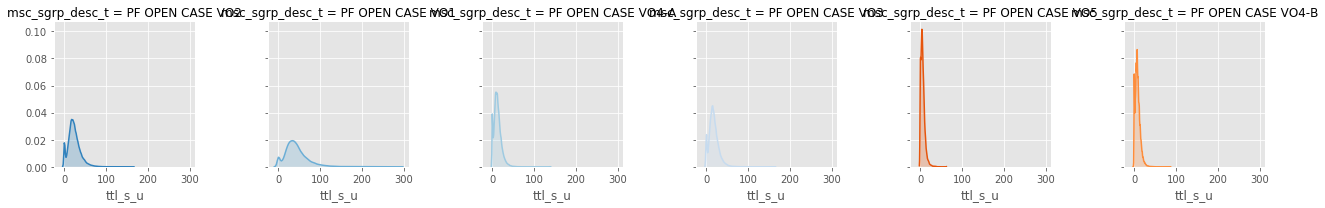

In [20]:
grid = sns.FacetGrid(df, col="msc_sgrp_desc_t", hue="msc_sgrp_desc_t", palette="tab20c")
grid.map(sns.kdeplot, "ttl_s_u", shade = True)
plt.show()

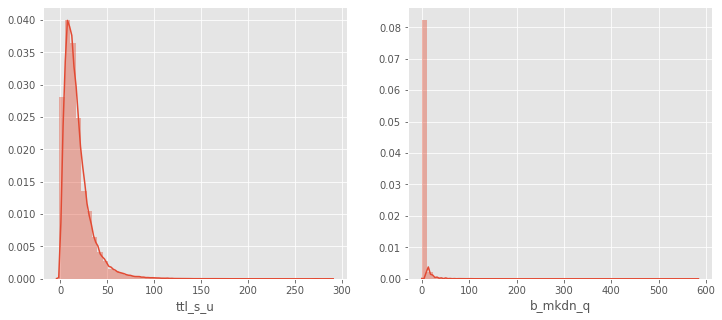

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))

plt.subplot(1,2,1)
sns.distplot(df['ttl_s_u'].replace(np.inf, np.nan).dropna())

plt.subplot(1,2,2)
sns.distplot(df['b_mkdn_q'].replace(np.inf, np.nan).dropna())

plt.show()

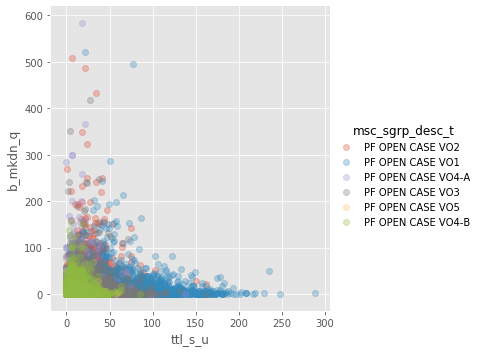

In [47]:
sns.lmplot(y = 'b_mkdn_q', 
           x = 'ttl_s_u', 
           hue = 'msc_sgrp_desc_t', 
           data = df, 
           fit_reg = False, 
           scatter_kws = {'alpha' : 0.3})
plt.show()